# Exercise 1

## Dataset and Library Imports

In [111]:
import pandas as pd
import sqlite3
from sqlite3 import Error

from scipy import stats

In [38]:
student_df = pd.read_csv('student_records.csv')

## Establishing functions for SQLite connection and creation

In [39]:
def create_connection(db_file):
    """ create a database connection to a SQLite database """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)
    
    return conn

In [40]:
def table_from_df(df, table_name):
    try:
        df.to_sql(name=table_name, con=conn, if_exists='replace', index=False)
    except Error as e:
        print(e)
    conn.commit()

In [41]:
def select_all_from_table(select_sql, table_name):
    try:
        c = conn.cursor()
        c.execute(select_sql)
        result = c.fetchall()
        return result
    except Error as e:
        print(e)



## Database and table creation

In [133]:
conn = create_connection(r"student.db")
tn = 'student'
select_sql = '''SELECT * from {}'''.format(tn)

if conn is not None:
        table_from_df(student_df, tn)
        all_data = select_all_from_table(select_sql, tn)
        print(all_data)
else:
    print("Error! cannot create the database connection.")

[(1, 'M', 1, 80), (2, 'M', 0, 90), (3, 'M', 0, 60), (4, 'M', 1, 65), (5, 'F', 0, 80), (6, 'F', 0, 55), (7, 'F', 0, 70), (8, 'F', 1, 90), (9, 'F', 1, 92), (10, 'F', 1, 65), (11, 'F', 1, 70), (12, 'M', 0, 75), (13, 'F', 0, 80), (14, 'F', 1, 85), (15, 'F', 1, 90), (16, 'M', 1, 95), (17, 'M', 1, 40), (18, 'M', 1, 50), (19, 'F', 0, 60), (20, 'M', 0, 70), (21, 'M', 0, 80), (22, 'M', 1, 90), (23, 'F', 1, 55), (24, 'F', 1, 60), (25, 'F', 1, 65), (26, 'F', 0, 70), (27, 'F', 0, 75), (28, 'M', 0, 80), (29, 'M', 0, 85), (30, 'M', 1, 90)]


In [134]:
columns = ['Student_No.', 'Gender', 'Score_Football_Q', 'Total_Exam_Score']
all_data_df = pd.DataFrame(all_data, columns=columns)
all_data_df

,Student_No.,Gender,Score_Football_Q,Total_Exam_Score
0,1,M,1,80
1,2,M,0,90
2,3,M,0,60
3,4,M,1,65
4,5,F,0,80
5,6,F,0,55
6,7,F,0,70
7,8,F,1,90
8,9,F,1,92
9,10,F,1,65


## Analysis

### gender vs football question

In [46]:
# does the 'football' question have a gender bias? if so, is it a significant difference?
analysis_sql = '''  SELECT Score_Football_Question, Gender, count(*)
                    from {}
                    group by Score_Football_Question, Gender
                  
               '''.format(tn)
query_df = pd.DataFrame(select_all_from_table(analysis_sql, tn), columns=['Score_Football_Question', 'Gender', 'count_student'])
query_df

,Score_Football_Question,Gender,count_student
0,0,F,7
1,0,M,7
2,1,F,9
3,1,M,7


we're going to interprete the result of our hyposthesis testing via the p-value

A p-value larger than a chosen threshold (e.g. 5% or 1%) indicates that our observation is like to have occurred by chance. Therefore, we do not reject the null hypothesis of equal population means. If the p-value is smaller than our threshold, then we have evidence against the null hypothesis of equal population means.

In [112]:
# run hypothesis testing (to test if it is a significant difference or not)
male_sql = '''  SELECT Score_Football_Question, Gender
                from {}
                where Gender='M'    
           '''.format(tn)
male_df = pd.DataFrame(select_all_from_table(male_sql, tn), columns=['Score_Football_Question', 'Gender'])
male_responses = male_df['Score_Football_Question'].values

female_sql = '''  SELECT Score_Football_Question, Gender
                  from {}
                  where Gender='F'
             '''.format(tn)
female_df = pd.DataFrame(select_all_from_table(female_sql, tn), columns=['Score_Football_Question', 'Gender'])
female_responses = female_df['Score_Football_Question'].values

stats.ttest_ind(male_responses, female_responses)

Ttest_indResult(statistic=-0.3313667478318056, pvalue=0.7428348597535019)

**NULL HYPOTHESIS**: no significant difference between males and females count

**THRESHOLD** 5% probability of obtaining the observed results 

A p-value larger than a chosen threshold (5%) indicates that our observation of obtaining more extreme values is likely to have occurred by chance. Therefore, we do not reject the null hypothesis of equal population means. If the p-value is smaller than our threshold, then we have evidence against the null hypothesis of equal population means.

**CONCLUSION** since p-value is approximately 0.743, we accept the null hypothesis, this means that both male and female responses have no significant difference in distribution of football question scores (distribution of count 0/1). we can safely say that no there is no gender bias with regards to answering the football question

### gender vs total exam score

In [116]:
# is there a difference between males and females with regards to exam score? 
analysis_sql2 = '''  SELECT Gender, avg(Total_Examination_Score)
                     from {}
                     group by Gender
                  
                '''.format(tn)

query_df2 = pd.DataFrame(select_all_from_table(analysis_sql2, tn), columns=['Gender', 'Total_Exam_Score'])
query_df2

,Gender,Total_Exam_Score
0,F,72.625
1,M,75.000


there does not seem to be a significant difference between male and female score by average. we will further test this significance with t-test

In [118]:
# run hypothesis testing (to test if it is a significant difference or not)
male_sql = '''  SELECT Gender, Total_Examination_Score
                from {}
                where Gender='M'    
           '''.format(tn)
male_df = pd.DataFrame(select_all_from_table(male_sql, tn), columns=['Gender', 'Total_Examination_Score'])
male_responses = male_df['Total_Examination_Score'].values

female_sql = '''  SELECT Gender, Total_Examination_Score
                  from {}
                  where Gender='F'
             '''.format(tn)
female_df = pd.DataFrame(select_all_from_table(female_sql, tn), columns=['Gender', 'Total_Examination_Score'])
female_responses = female_df['Total_Examination_Score'].values

stats.ttest_ind(male_responses, female_responses)

Ttest_indResult(statistic=0.45193608988724343, pvalue=0.6547966580418801)

**CONCLUSION** since p-value is approximately 0.655, we accept the null hypothesis, this means that both male and female exam scores have no significant difference in their distribution. so males and female scores have no signifcant differences between them in the data.

### Establishing Possible Correlations

In [144]:
# is answering the football question correlated with general exam scores? if so, how might that relate to gender?
# let's construct a correlation matrix to see if there is any notable correlations
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder

In [141]:
# first we must encode the gender feature 
selected_corr_df = all_data_df.copy()

selected_corr_df = all_data_df[['Gender', 'Score_Football_Q', 'Total_Exam_Score']]
selected_corr_df['Gender'] = all_data_df['Gender'].map({'M': 1, 'F': 0})

C:\Users\modaj\AppData\Local\Temp\ipykernel_6128\3351735667.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_corr_df['Gender'] = all_data_df['Gender'].map({'M': 1, 'F': 0})


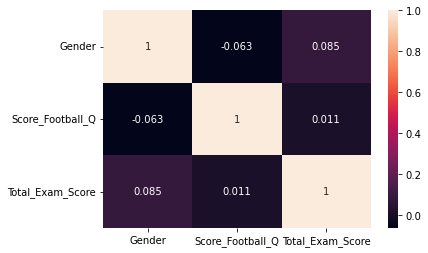

In [145]:
correlation_mat = selected_corr_df.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

High degree: If the coefficient value lies between ± 0.50 and ± 1, then it is said to be a strong correlation. Moderate degree: If the value lies between ± 0.30 and ± 0.49, then it is said to be a medium correlation. Low degree: When the value lies below + . 29, then it is said to be a small correlation.

**CONCLUSION** All the correlations between each feature are very small, thus establishing the fact there is no real relation between score football question and total exam score, in addition to the previous analysis results (gender vs total_exam_score, gender vs score football question). all indicates that there is no gender bias in the data in general.

### Closing database connection

In [146]:
conn.close()